# Avacado Project

Avocado is a fruit consumed by people heavily in the United States. 

Content:
 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("avocado.csv")
df.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2069,41,15-03-2015,1.12,119124.45,47388.04,43327.94,73.88,28334.59,27985.70,348.89,0.00,conventional,2015,Roanoke
11185,31,24-05-2015,0.89,22034.63,191.26,15349.07,0.00,6494.30,1124.50,5369.80,0.00,organic,2015,Roanoke
13359,22,24-07-2016,1.41,4106.49,588.36,0.00,0.00,3518.13,3458.13,60.00,0.00,organic,2016,NewOrleansMobile
2107,27,21-06-2015,1.27,422723.91,137206.11,215068.66,14700.40,55748.74,55744.30,4.44,0.00,conventional,2015,Sacramento
6982,41,19-03-2017,1.35,2933076.38,607103.98,1325162.91,30753.50,970055.99,867587.43,98619.63,3848.93,conventional,2017,Midsouth
9894,40,22-03-2015,2.01,683.76,20.54,659.89,0.00,3.33,3.33,0.00,0.00,organic,2015,GrandRapids
263,3,06-12-2015,1.23,108457.82,1737.71,58197.34,167.12,48355.65,48355.65,0.00,0.00,conventional,2015,BuffaloRochester
6374,16,10-09-2017,1.86,111733.79,2360.30,46227.08,23127.70,40018.71,29053.60,3726.39,7238.72,conventional,2017,GrandRapids
8594,8,28-01-2018,0.92,281913.49,78131.98,27858.19,11786.66,164136.66,155062.73,9071.23,2.70,conventional,2018,CincinnatiDayton
8191,31,28-05-2017,1.23,220314.55,79848.31,14664.64,490.82,125310.78,102547.24,17838.96,4924.58,conventional,2017,StLouis


In [4]:
df.shape

(18249, 14)

there are total 18249 rows and 14 columns in this data set .

input features :


Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

output feature :

The dataset can be seen in two angles to find the region and find the average price .so in first case the output feature is region and in the second case the output feature is avarage price.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


from the above information we can see that there are two catagorical features ( region and date) and rest are numerical features.

<AxesSubplot:>

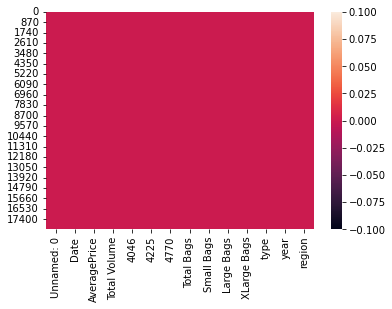

In [6]:
sns.heatmap(df.isnull())

here we can see that there is no missing values is the data set

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


here we can see the statistical description of the data set.
here wecan see standard deviation is so high in some columns like XLarge Bags ,Total Volume	4046,4225,4770,Total Bags,Small  Bags ,Large Bags .

in most of the columns there is a high deference in 75% and max except AveragePrice,Year.
removal of skewness and outliers is required in this dataset.

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [1]:
import scipy
from scipy.stats import zscore

In [15]:
z= np.abs(zscore(df))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      typ

In [16]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [17]:
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


Here we have applied Z score method to remove outliers . In the next step we will calculate the percentage data loss.

In [9]:
df.drop(["Unnamed: 0" , "Date"] , axis =1 , inplace =True)

"Unnamed: 0" , "Date" these two columns are less important in this dataset so we are removing these two columns

In [10]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= oe.fit_transform(df[i].values.reshape(-1,1))
        

In [14]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0


here we have used ordinal encoding technique to encode catagorical features.

In [96]:
df_new.type.value_counts()

1.0    8992
0.0    8659
Name: type, dtype: int64

In [64]:
df.region.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
51.0    338
52.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
53.0    335
Name: region, dtype: int64

data is balanced so no need to balance this dataset

In [65]:
df["XLarge Bags"].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [18]:
dftype=df.groupby("type").mean()
dftype  

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
type,,,,,,,,,,,
0.0,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929,26.500000
1.0,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868,26.491286


here we can see the total volume , avarage price on the basis of type ,avg price of type 1 is slightly greater than type 0 where total volume is less in case of type 1 in comparison to type 0

In [67]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
dtype: float64

In [20]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

here we can see that the data is little bit skewd and removing of skewness is needed.we will remove the skewness in next steps.

In [24]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]


here we have splitted the data into input and output variable

In [25]:
from sklearn.preprocessing import power_transform
xt=power_transform(x, method="yeo-johnson")
xt=pd.DataFrame(xt)
xt.columns = x.columns
xt

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210647
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210647
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210647
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210647
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210647
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.978707
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.978707
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.978707
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.978707


here we have applied yeo jhonson method for removing the skewness.

In [32]:
dataloss =(18249-17651) /18249 *100
dataloss

3.276891884486821

after removing outliers we can see that data loss percentage is not so much , so we are going for the next step that is splitting of data into input variable and output variable.

In [26]:
xt.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
dtype: float64

here we can see that skewness is removed in most of the columns.

<AxesSubplot:>

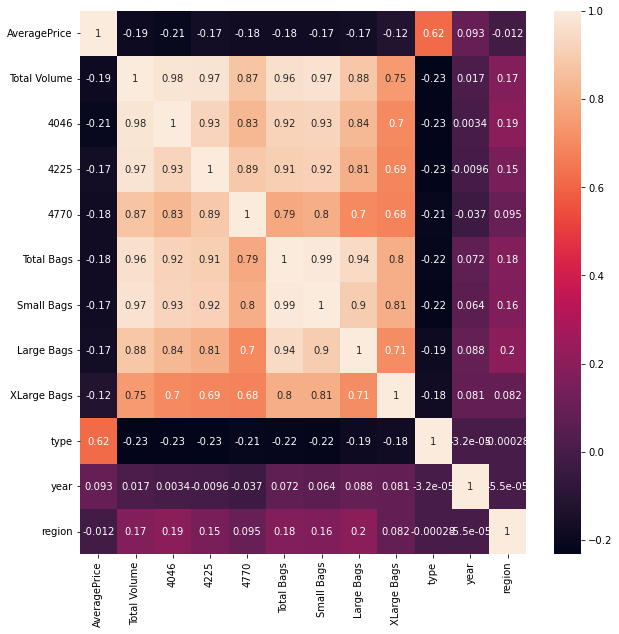

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot =True)

here we can see the corelation of different features .

here we can see that total bags , small bags , large bags , extra large bags these columns are highly corelated with each other.

avarage price column is highly negetively corelated with maximum other features

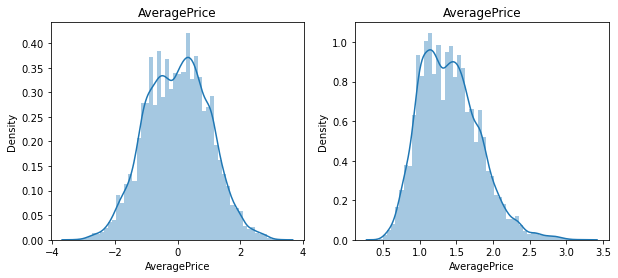

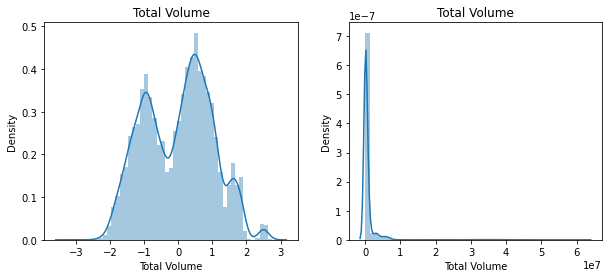

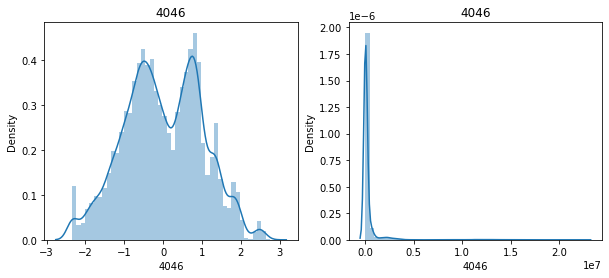

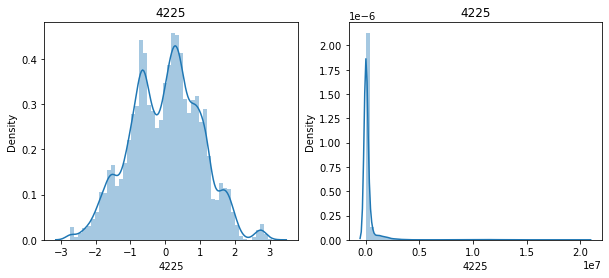

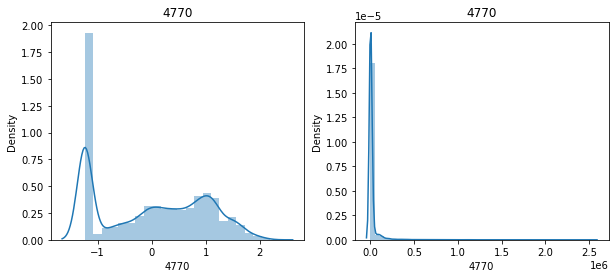

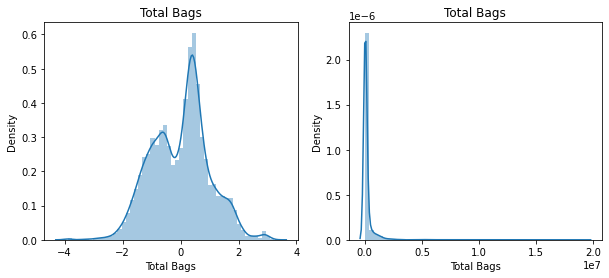

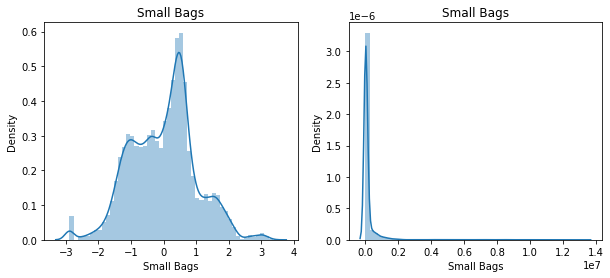

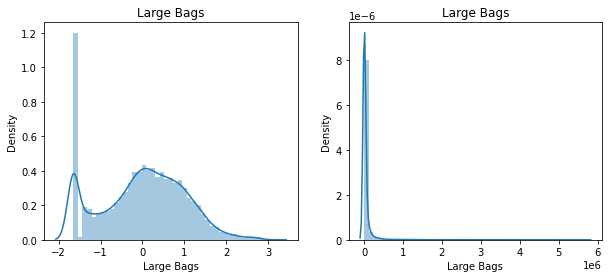

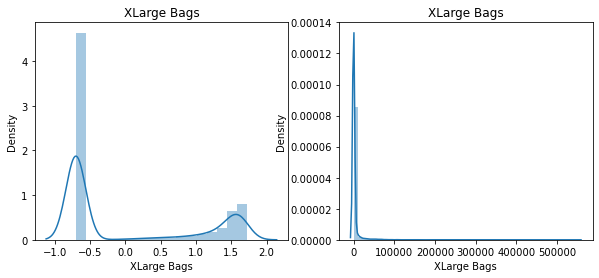

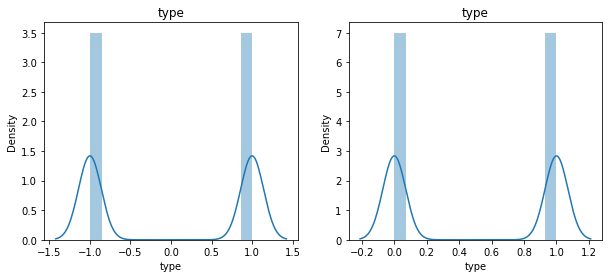

In [74]:
for col in xt.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(xt[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(x[col])
    plt.title(col)

here also we can compare the distplots before removing skewness and afer remving skewness.before removing skewness maximum columns were not normally distributed.there is a significant change in every columns except type after removing skewness .

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

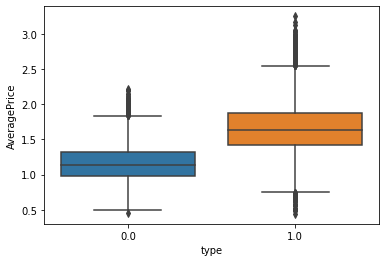

In [28]:
sns.boxplot(x="type", y="AveragePrice", data=df)

from theabove boxplot we can see that avarage price of type 1 is greater than type 0

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

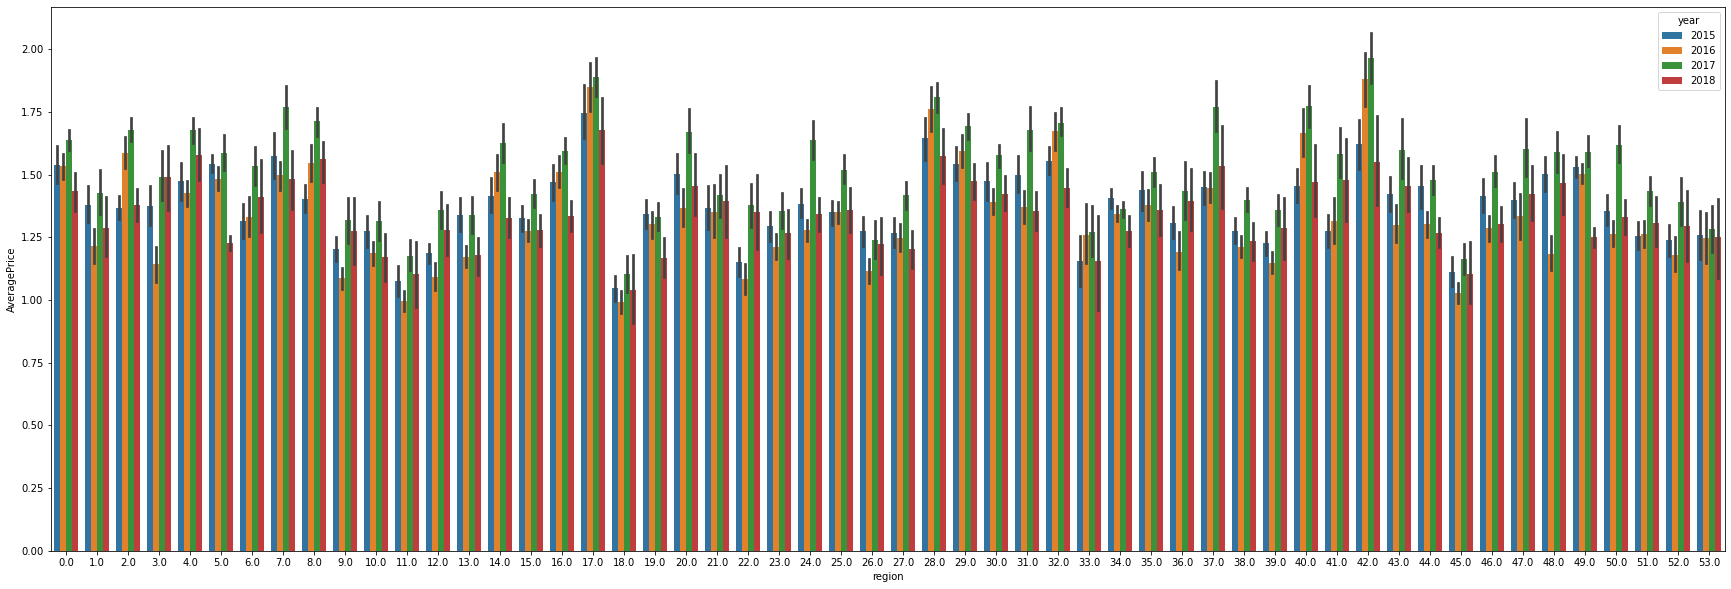

In [47]:
plt.figure(figsize=(30,10))
mask = df["type"]==0
sns.barplot(y=df["AveragePrice"] , x=df["region"],hue=df["year"],data=df[mask])


<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

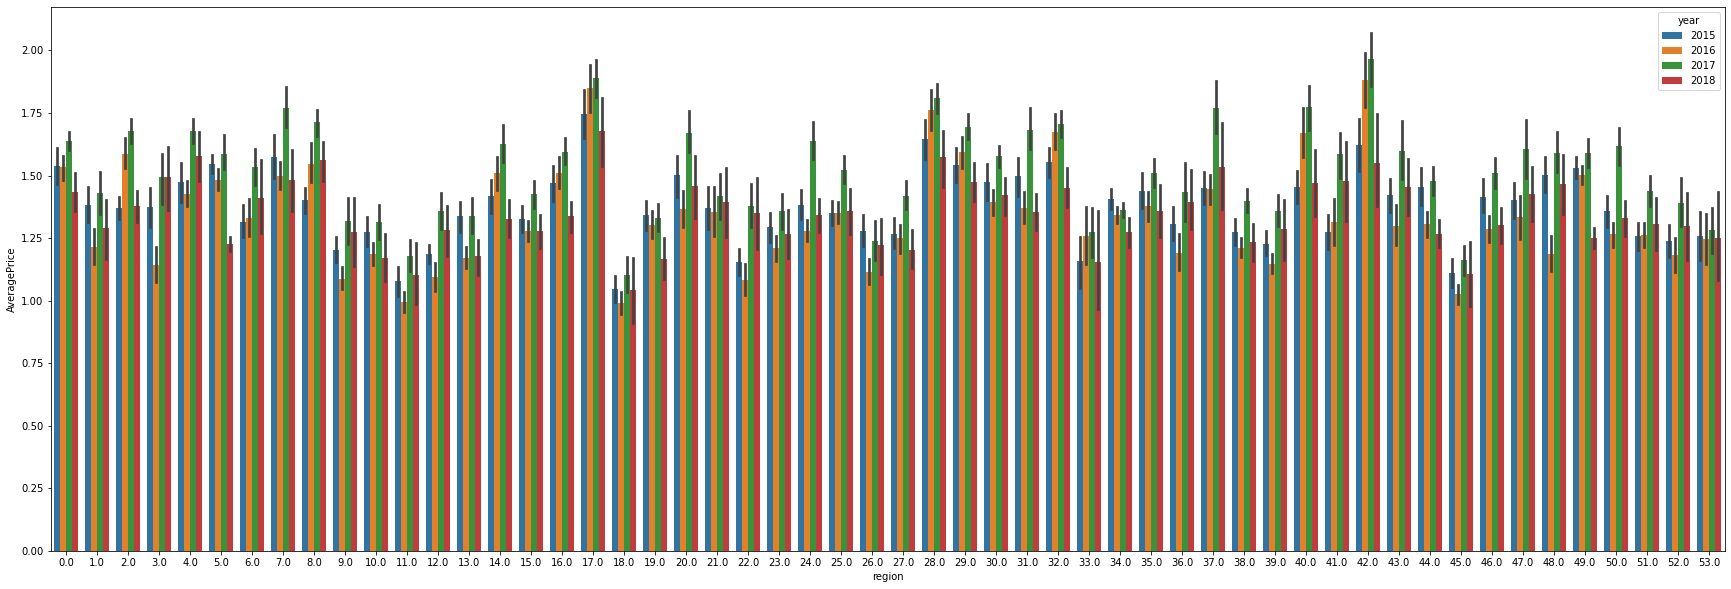

In [48]:
plt.figure(figsize=(30,10))
mask = df["type"]==1
sns.barplot(y=df["AveragePrice"] , x=df["region"],hue=df["year"],data=df[mask])


from the above two multivariate analysis we can compare the avg price , region and year for two different type of avocados.
we can see that the avarage price of both types of avocados is highest in the region 42 ,in every year , so we can say that region 42is the best for both type of avocadoes.
avg price of avocados from region 18 is the lowest.


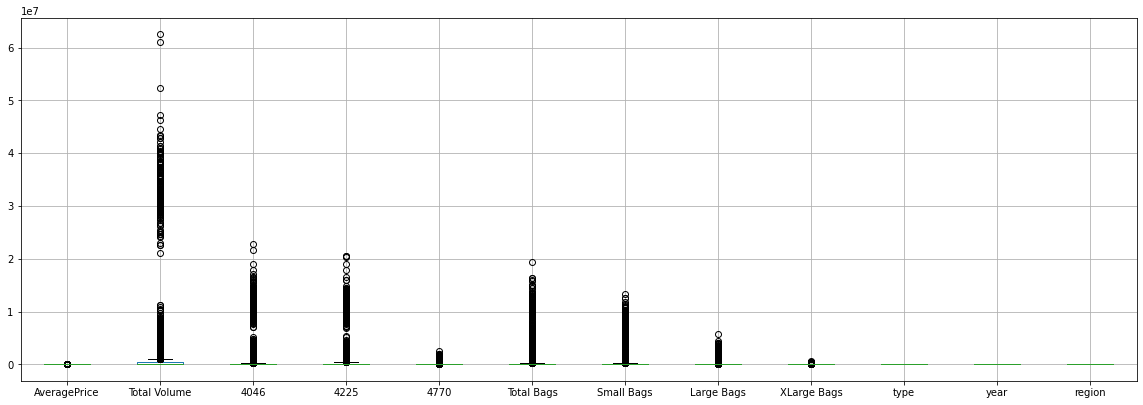

In [30]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

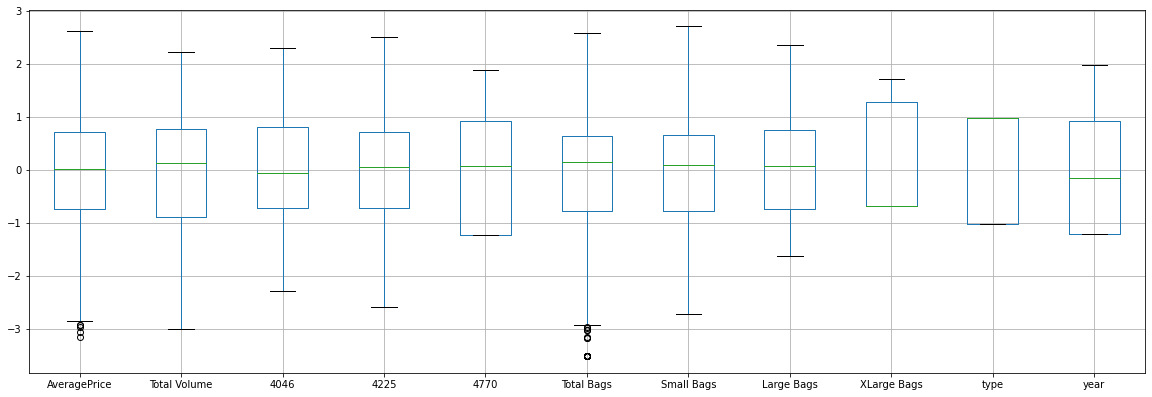

In [29]:
xt.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

we can compare the boxplots and we can see that maximum outliers are removed.

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xc=sc.fit_transform(xt)
xc=pd.DataFrame(xc)
xc.columns=xt.columns
xc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210618
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210618
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210618
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210618
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210618
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309,1.978735
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309,1.978735
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309,1.978735
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309,1.978735


here we have appliedstandard scaler for scaling the data .

In [108]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [109]:
def calc_vif(xc):
    vif = pd.DataFrame()
    vif["variables"] = xc.columns
    vif["V_I_F"] = [variance_inflation_factor(xc.values,i) for i in range(xc.shape[1])]
    return(vif)

In [110]:
calc_vif(xc)

,variables,V_I_F
0,AveragePrice,2.127152
1,Total Volume,54.863391
2,4046,6.905481
3,4225,12.362805
4,4770,3.941440
5,Total Bags,35.756710
6,Small Bags,17.333635
7,Large Bags,3.472647
8,XLarge Bags,2.039068
9,type,4.115674


here we are checking multicolinearity and for having the most vif value we have decided to drop hr column.

In [113]:
xc.drop(["Total Volume","Total Bags"],axis=1,inplace =True)

"Total Volume","Total Bags" , these two columns have high vif value , it means there will be muti co liniarity present in these two columns so we are removing these two columns .

In [140]:
calc_vif(xc)

,variables,V_I_F
0,AveragePrice,1.913817
1,4046,3.602702
2,4225,4.314199
3,4770,3.930990
4,Small Bags,4.119981
5,Large Bags,2.038690
6,XLarge Bags,2.027128
7,type,3.961605
8,year,1.355953


now we can see there is not much colinearity present in the data set .

In [55]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report,r2_score,mean_squared_error , mean_absolute_error
from sklearn.model_selection import train_test_split

In [56]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc,y,test_size=0.2,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8178986122911357 on random state 97


In [58]:
score=cross_val_score(dtc,xc,y,cv=5)
score.mean()

0.5580460719022049

In [59]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc,y,test_size=0.2,random_state=i)
    dtce=DecisionTreeClassifier(criterion = "entropy")
    dtce.fit(x_train,y_train)
    preddtce=dtc.predict(x_test)
    acc=accuracy_score(y_test,preddtce)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9679977343528745 on random state 123


In [60]:
score=cross_val_score(dtce,xc,y,cv=5)
score.mean()

0.555834177736166

In [61]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc,y,test_size=0.2,random_state=i)
    rfc=RandomForestClassifier(n_estimators=200)
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    acc=accuracy_score(y_test,predrfc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9212687623902577 on random state 168


In [62]:
score=cross_val_score(rfc,xc,y,cv=5)
score.mean()

0.6826841179259702

In [63]:
maxacc=0
maxrs=0
from sklearn.ensemble import AdaBoostClassifier
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc,y,test_size=0.2,random_state=i)
    adc=AdaBoostClassifier()
    adc.fit(x_train,y_train)
    predadc=adc.predict(x_test)
    acc=accuracy_score(y_test,predadc)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.0928915321438686 on random state 43


In [ ]:
score=cross_val_score(adc,xc,y,cv=5)
score.mean()

In [67]:
maxacc=0
maxrs=0
from sklearn.svm import SVC

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xc,y,test_size=0.2,random_state=i)
    def svmkernel(ker):
        svc=SVC()
        svc.fit(x_train,y_train)
        predsvc=svc.predict(x_test)
        acc=accuracy_score(y_test,predsvc)
        if acc > maxacc:
            maxacc=acc
            maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0 on random state 0


In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features":["auto","sqrt","log2"],"max_depth":[0,1,2,3,4,5,6,7,8],"criterion":["gini","entropy"]}
gscv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

In [73]:
gscv.fit(xc,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [74]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [75]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt')

In [76]:
gscvpred=gscv.best_estimator_.predict(x_test)

In [77]:
print(accuracy_score(y_test,gscvpred))

0.8385726423109601


here the output column is region and we have used various classification models , random forest classifier model has given the bes result here so we have used gridsearch cv for this model and the score is 84% .

In [114]:
xc

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.117824,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.677919,-1.019047,-1.210618
1,-0.064330,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.677919,-1.019047,-1.210618
2,-1.298865,-0.731776,0.649333,0.023923,-0.374453,-0.758523,-0.677919,-1.019047,-1.210618
3,-0.829026,-0.632592,0.468799,-0.121164,-0.510991,-0.699123,-0.677919,-1.019047,-1.210618
4,-0.253635,-0.684504,0.262126,-0.110491,-0.490534,-0.607027,-0.677919,-1.019047,-1.210618
...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.462066,-0.926028,-1.228986,-0.175753,-0.412401,-0.677919,0.981309,1.978735
17647,0.826487,-0.618019,-0.670600,-1.228986,-0.331971,-0.484991,-0.677919,0.981309,1.978735
17648,1.184324,-0.617966,-0.778893,0.445710,-0.313756,-0.950743,-0.677919,0.981309,1.978735
17649,1.313296,-0.547011,-0.716371,0.445399,-0.250408,-0.916068,-0.677919,0.981309,1.978735


In [116]:
xp=xc.iloc[:,1:]
yp=xc.iloc[:,0]


here we have splitted the data set for predicting the avarage price of avocado , it is regression model problem so we are using various regression models to predit the avarage price

In [117]:
print(xp.shape)
print(yp.shape)

(17651, 8)
(17651,)


In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report,r2_score,mean_squared_error , mean_absolute_error
from sklearn.model_selection import train_test_split

In [118]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xp,yp,test_size=0.2,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.6937689352161769 on random state 6


In [119]:
score=cross_val_score(dtr,xp,yp,cv=5)
score.mean()

-0.28773371338681775

In [121]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xp,yp,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.5056483175552862 on random state 196


In [122]:
score=cross_val_score(lr,xp,yp,cv=5)
score.mean()

0.06929204945418099

In [123]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xp,yp,test_size=0.2,random_state=i)
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    predknr=knr.predict(x_test)
    acc=r2_score(y_test,predknr)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.8257070889000406 on random state 121


In [124]:
score=cross_val_score(knr,xp,yp,cv=5)
score.mean()

0.04931301650278534

In [125]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
rd = Ridge()
ls= Lasso()
parameters = {"alpha" : [0.0001,0.001,0.01,0.1]}

In [126]:
gscvr=GridSearchCV(Ridge(),parameters,cv=5)
gscvl=GridSearchCV(Lasso(),parameters,cv=5)
gscvr.fit(xp,yp)
gscvl.fit(xp,yp)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]})

In [127]:
gscvrpred=gscvr.best_estimator_.predict(x_test)
gscvlpred=gscvl.best_estimator_.predict(x_test)

In [128]:
print(r2_score(y_test,gscvrpred))
print(r2_score(y_test,gscvlpred))

0.4783592119869161
0.47831621739720165


In [130]:
score=cross_val_score(gscvl,xp,yp,cv=5)
score.mean()

0.0703100663258351

In [132]:
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(xp,yp,test_size=0.2,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    predrfr=rfr.predict(x_test)
    acc=rfr.score(x_train,y_train)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"on random state",maxrs)

best accuracy score is 0.9761935392289478 on random state 110


In [134]:
x_train,x_test,y_train,y_test=train_test_split(xp,yp,test_size=0.2,random_state=110)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
acc=rfr.score(x_train,y_train)
print(acc)
print(r2_score(y_test,predrfr))

0.9756529228644001
0.8098856038632571


In [135]:
score=cross_val_score(rfr,xp,yp,cv=5)
score.mean()

0.27716762833602443

In [136]:
param = {"max_features":["auto","sqrt","log2"]}
gscvrfr=GridSearchCV(rfr,param,cv=5)
gscvrfr.fit(xp,yp)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [137]:
predgscvrfr=gscvrfr.best_estimator_.predict(x_test)

In [138]:
print(r2_score(y_test,predgscvrfr))

0.9764908842768774


from the above various models random forest regressor has givven the best result and we have used this model . we have applied grid search cv for best tuninig and to get the best estimator value for this model .
r2 score is 98%

In [139]:
import joblib
joblib.dump(gscvrfr.best_estimator_,"avocado.pkl")

['avocado.pkl']